### Building A Classifier-
#### To predict the cost of damage whenever there is a crash

### Importing necessary libraries & Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.style as style
%matplotlib inline
import warnings 
warnings.filterwarnings("ignore")
plt.style.use('ggplot')
plt.xkcd()

In [2]:
df = pd.read_csv('traffic_crashes_10k2.csv')
pd.set_option('max_columns', None) #set dataframe to view all columns
df.head(2) 

,id,crash_record_id,rd_no,crash_date,posted_speed_limit,traffic_control_device,device_condition,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,report_type,crash_type,damage,date_police_notified,prim_contributory_cause,sec_contributory_cause,street_no,street_direction,street_name,beat_of_occurrence,num_units,most_severe_injury,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,injuries_unknown,crash_hour,crash_day_of_week,crash_month,latitude,longitude,location
0,280396,a48eb663494810bd8058ee5acbf04ec98b8254ee6d3cc7...,JC525633,11/26/2019 05:45:00 PM,30,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,RAIN,DARKNESS,PEDALCYCLIST,ONE-WAY,STRAIGHT AND LEVEL,WET,UNKNOWN,NOT ON SCENE (DESK REPORT),INJURY AND / OR TOW DUE TO CRASH,$500 OR LESS,11/26/2019 06:17:00 PM,IMPROPER OVERTAKING/PASSING,IMPROPER OVERTAKING/PASSING,799,W,MELROSE ST,1925.0,3,"REPORTED, NOT EVIDENT",1.0,0.0,0.0,0.0,1.0,2.0,0.0,17,3,11,41.940958,-87.649185,POINT (-87.649185137051 41.940957825729)
1,406594,e7f110ed1bf2d7ad3a5938d6c4749221e141ee0825fc81...,JB493847,10/28/2018 04:40:00 PM,30,NO CONTROLS,NO CONTROLS,RAIN,DAYLIGHT,OTHER OBJECT,DIVIDED - W/MEDIAN BARRIER,STRAIGHT AND LEVEL,WET,NO DEFECTS,ON SCENE,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",10/28/2018 04:50:00 PM,EQUIPMENT - VEHICLE CONDITION,WEATHER,4420,W,CERMAK RD,1012.0,1,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,0.0,16,1,10,41.851498,-87.735394,POINT (-87.735393838111 41.851498141703)


#### Checking shape & null values

In [3]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 39 columns):
id                               10000 non-null int64
crash_record_id                  10000 non-null object
rd_no                            9922 non-null object
crash_date                       10000 non-null object
posted_speed_limit               10000 non-null int64
traffic_control_device           10000 non-null object
device_condition                 10000 non-null object
weather_condition                10000 non-null object
lighting_condition               10000 non-null object
first_crash_type                 10000 non-null object
trafficway_type                  10000 non-null object
alignment                        10000 non-null object
roadway_surface_cond             10000 non-null object
road_defect                      10000 non-null object
report_type                      9767 non-null object
crash_type                       10000 non-null object
damage          

In [4]:
df.shape

(10000, 39)

In [5]:
df.isna().sum() 

id                                 0
crash_record_id                    0
rd_no                             78
crash_date                         0
posted_speed_limit                 0
traffic_control_device             0
device_condition                   0
weather_condition                  0
lighting_condition                 0
first_crash_type                   0
trafficway_type                    0
alignment                          0
roadway_surface_cond               0
road_defect                        0
report_type                      233
crash_type                         0
damage                             0
date_police_notified               0
prim_contributory_cause            0
sec_contributory_cause             0
street_no                          0
street_direction                   0
street_name                        0
beat_of_occurrence                 0
num_units                          0
most_severe_injury                19
injuries_total                    18
i

#### Dropping all rows which has any null value

In [6]:
df= df.dropna(thresh=39) 

In [7]:
df.describe() 

,id,posted_speed_limit,street_no,beat_of_occurrence,num_units,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,injuries_unknown,crash_hour,crash_day_of_week,crash_month,latitude,longitude
count,9622.000000,9622.000000,9622.000000,9622.000000,9622.000000,9622.000000,9622.000000,9622.000000,9622.000000,9622.000000,9622.000000,9622.0,9622.000000,9622.000000,9622.000000,9622.000000,9622.000000
mean,230150.067554,28.224693,3675.631573,1250.775307,2.030243,0.171794,0.001559,0.017460,0.096446,0.056329,2.020266,0.0,13.275203,4.135003,6.858553,41.858899,-87.679049
std,132584.219207,6.421920,2856.592725,703.704629,0.414652,0.524726,0.039455,0.153627,0.390951,0.301999,1.117513,0.0,5.397525,1.984652,3.396142,0.086589,0.059436
min,43.000000,0.000000,1.000000,111.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,1.000000,41.644694,-87.914197
25%,115964.250000,30.000000,1213.500000,715.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,10.000000,2.000000,4.000000,41.783296,-87.722238
50%,230000.000000,30.000000,3200.000000,1214.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.0,14.000000,4.000000,7.000000,41.876748,-87.673643
75%,343469.750000,30.000000,5600.000000,1824.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.0,17.000000,6.000000,10.000000,41.925294,-87.633436
max,460917.000000,65.000000,13730.000000,2535.000000,7.000000,6.000000,1.000000,4.000000,6.000000,5.000000,21.000000,0.0,23.000000,7.000000,12.000000,42.022551,-87.524587


#### Checking NUNIQUE

In [8]:
df.nunique() 

id                               9622
crash_record_id                  9622
rd_no                            9622
crash_date                       9467
posted_speed_limit                 18
traffic_control_device             16
device_condition                    7
weather_condition                  11
lighting_condition                  6
first_crash_type                   17
trafficway_type                    19
alignment                           6
roadway_surface_cond                7
road_defect                         7
report_type                         3
crash_type                          2
damage                              3
date_police_notified             9551
prim_contributory_cause            38
sec_contributory_cause             40
street_no                        3812
street_direction                    4
street_name                       821
beat_of_occurrence                271
num_units                           7
most_severe_injury                  5
injuries_tot

#### Analyzing Column 'rd_number'

In [9]:
# Splitting the alpha numerical values and adding columns
df['rd_number'] = df['rd_no'].str.replace('([A-Z]+)', '') 
df['rd_Letter'] = df['rd_no'].str.extract('([A-Z]+)')
df.head(2) 

,id,crash_record_id,rd_no,crash_date,posted_speed_limit,traffic_control_device,device_condition,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,report_type,crash_type,damage,date_police_notified,prim_contributory_cause,sec_contributory_cause,street_no,street_direction,street_name,beat_of_occurrence,num_units,most_severe_injury,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,injuries_unknown,crash_hour,crash_day_of_week,crash_month,latitude,longitude,location,rd_number,rd_Letter
0,280396,a48eb663494810bd8058ee5acbf04ec98b8254ee6d3cc7...,JC525633,11/26/2019 05:45:00 PM,30,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,RAIN,DARKNESS,PEDALCYCLIST,ONE-WAY,STRAIGHT AND LEVEL,WET,UNKNOWN,NOT ON SCENE (DESK REPORT),INJURY AND / OR TOW DUE TO CRASH,$500 OR LESS,11/26/2019 06:17:00 PM,IMPROPER OVERTAKING/PASSING,IMPROPER OVERTAKING/PASSING,799,W,MELROSE ST,1925.0,3,"REPORTED, NOT EVIDENT",1.0,0.0,0.0,0.0,1.0,2.0,0.0,17,3,11,41.940958,-87.649185,POINT (-87.649185137051 41.940957825729),525633,JC
1,406594,e7f110ed1bf2d7ad3a5938d6c4749221e141ee0825fc81...,JB493847,10/28/2018 04:40:00 PM,30,NO CONTROLS,NO CONTROLS,RAIN,DAYLIGHT,OTHER OBJECT,DIVIDED - W/MEDIAN BARRIER,STRAIGHT AND LEVEL,WET,NO DEFECTS,ON SCENE,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",10/28/2018 04:50:00 PM,EQUIPMENT - VEHICLE CONDITION,WEATHER,4420,W,CERMAK RD,1012.0,1,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,0.0,16,1,10,41.851498,-87.735394,POINT (-87.735393838111 41.851498141703),493847,JB


JB    2527
JC    2390
JD    1787
JA    1741
HZ     954
HY     219
JH       1
NB       1
JP       1
QZ       1
Name: rd_Letter, dtype: int64

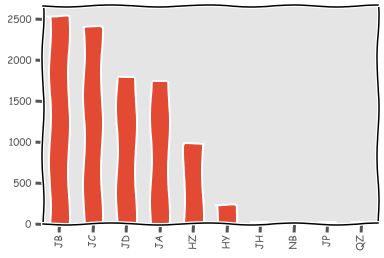

In [10]:
df['rd_Letter'].value_counts().plot.bar() 
df['rd_Letter'].value_counts() 

#### Analyzing Column report_type

In [11]:
df['report_type'].value_counts()

NOT ON SCENE (DESK REPORT)    5793
ON SCENE                      3824
AMENDED                          5
Name: report_type, dtype: int64

In [12]:
df.report_type[df.report_type == 'NOT ON SCENE (DESK REPORT)'] = 0
df.report_type[df.report_type == 'ON SCENE'] = 1
df.report_type[df.report_type == 'AMENDED'] = 1
df['report_type'].value_counts()

0    5793
1    3829
Name: report_type, dtype: int64

##### Numerical Value : df.report_type
* NOT ON SCENE (DESK REPORT) = 0
* ON SCENE = 1
* AMENDED = 1

#### Analyzing Column crash_type

In [13]:
df['crash_type'].value_counts()

NO INJURY / DRIVE AWAY              7347
INJURY AND / OR TOW DUE TO CRASH    2275
Name: crash_type, dtype: int64

In [14]:
df.crash_type[df.crash_type == 'NO INJURY / DRIVE AWAY'] = 0
df.crash_type[df.crash_type == 'INJURY AND / OR TOW DUE TO CRASH'] = 1
df['crash_type'].value_counts() 

0    7347
1    2275
Name: crash_type, dtype: int64

##### Numerical Value : df.crash_type
* NO INJURY / DRIVE AWAY = 0
* INJURY AND / OR TOW DUE TO CRASH = 1

#### Analyzing Column damage

In [15]:
df['damage'].value_counts()

OVER $1,500      5427
$501 - $1,500    2888
$500 OR LESS     1307
Name: damage, dtype: int64

In [16]:
df.damage[df.damage == 'OVER $1,500'] = 1
df.damage[df.damage == '$501 - $1,500'] = 0
df.damage[df.damage == '$500 OR LESS'] = 0
df['damage'].value_counts()

1    5427
0    4195
Name: damage, dtype: int64

##### Numerical Value : df.damage
* Dollar 500 OR LESS = 0 
* Dollar 501 to 1,500 = 0
* Dollar OVER 1,500 = 1 

#### Analyzing Columns on Injuries

In [17]:
df['injuries_unknown'].value_counts()

0.0    9622
Name: injuries_unknown, dtype: int64

In [18]:
df['injuries_fatal'].value_counts()

0.0    9607
1.0      15
Name: injuries_fatal, dtype: int64

In [19]:
df['injuries_incapacitating'].value_counts()

0.0    9477
1.0     128
2.0      13
4.0       2
3.0       2
Name: injuries_incapacitating, dtype: int64

In [20]:
df['injuries_no_indication'].value_counts() 

2.0     4483
1.0     2912
3.0     1249
4.0      462
5.0      204
0.0      171
6.0       90
7.0       27
8.0       16
9.0        6
21.0       1
14.0       1
Name: injuries_no_indication, dtype: int64

In [21]:
df['injuries_non_incapacitating'].value_counts()

0.0    8914
1.0     555
2.0     105
3.0      36
4.0       8
6.0       3
5.0       1
Name: injuries_non_incapacitating, dtype: int64

In [22]:
df['injuries_reported_not_evident'].value_counts()

0.0    9212
1.0     317
2.0      64
3.0      21
4.0       6
5.0       2
Name: injuries_reported_not_evident, dtype: int64

In [23]:
df['injuries_total'].value_counts()

0.0    8415
1.0     900
2.0     208
3.0      70
4.0      22
6.0       4
5.0       3
Name: injuries_total, dtype: int64

In [24]:
df['most_severe_injury'].value_counts()

NO INDICATION OF INJURY     8415
NONINCAPACITATING INJURY     679
REPORTED, NOT EVIDENT        371
INCAPACITATING INJURY        142
FATAL                         15
Name: most_severe_injury, dtype: int64

##### Important column seems to be most_severe_injury

#### Analyzing column 'location'

In [25]:
# Splitting the alpha numerical values and adding columns
df['location_number'] = df['location'].str.replace('([A-Z]+)', '') 
df['location_letter'] = df['location'].str.extract('([A-Z]+)')
df.head(2) 

,id,crash_record_id,rd_no,crash_date,posted_speed_limit,traffic_control_device,device_condition,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,report_type,crash_type,damage,date_police_notified,prim_contributory_cause,sec_contributory_cause,street_no,street_direction,street_name,beat_of_occurrence,num_units,most_severe_injury,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,injuries_unknown,crash_hour,crash_day_of_week,crash_month,latitude,longitude,location,rd_number,rd_Letter,location_number,location_letter
0,280396,a48eb663494810bd8058ee5acbf04ec98b8254ee6d3cc7...,JC525633,11/26/2019 05:45:00 PM,30,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,RAIN,DARKNESS,PEDALCYCLIST,ONE-WAY,STRAIGHT AND LEVEL,WET,UNKNOWN,0,1,0,11/26/2019 06:17:00 PM,IMPROPER OVERTAKING/PASSING,IMPROPER OVERTAKING/PASSING,799,W,MELROSE ST,1925.0,3,"REPORTED, NOT EVIDENT",1.0,0.0,0.0,0.0,1.0,2.0,0.0,17,3,11,41.940958,-87.649185,POINT (-87.649185137051 41.940957825729),525633,JC,(-87.649185137051 41.940957825729),POINT
1,406594,e7f110ed1bf2d7ad3a5938d6c4749221e141ee0825fc81...,JB493847,10/28/2018 04:40:00 PM,30,NO CONTROLS,NO CONTROLS,RAIN,DAYLIGHT,OTHER OBJECT,DIVIDED - W/MEDIAN BARRIER,STRAIGHT AND LEVEL,WET,NO DEFECTS,1,1,1,10/28/2018 04:50:00 PM,EQUIPMENT - VEHICLE CONDITION,WEATHER,4420,W,CERMAK RD,1012.0,1,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,0.0,16,1,10,41.851498,-87.735394,POINT (-87.735393838111 41.851498141703),493847,JB,(-87.735393838111 41.851498141703),POINT


In [26]:
df.location_letter.value_counts() 

POINT    9622
Name: location_letter, dtype: int64

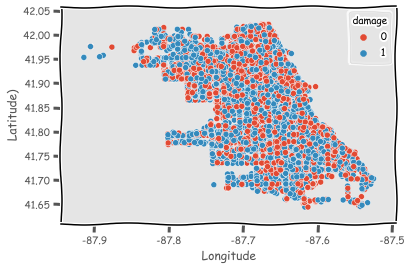

In [27]:
sns.scatterplot(x='longitude', y='latitude', data=df, hue='damage')
plt.xlabel('Longitude')
plt.ylabel('Latitude)')
plt.show()

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

<Figure size 1296x720 with 0 Axes>

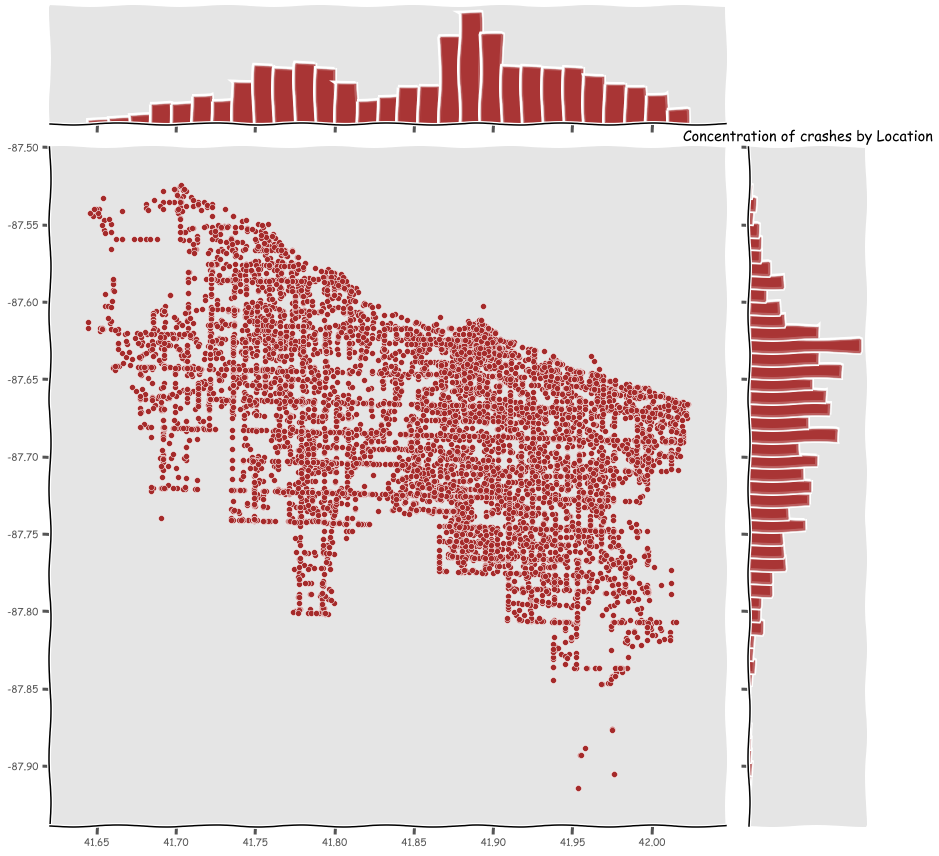

In [28]:
plt.figure(figsize=(18,10))
sns.jointplot(x=df.latitude.values, y=df.longitude.values, size=12,color='brown')
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.title("Concentration of crashes by Location")
sns.despine

#### Analyzing columns with time and date

In [32]:
df['crash_date']= pd.to_datetime(df['crash_date'])  

In [33]:
df['crash_year'] = df['crash_date'].dt.year
df['crash_day'] = df['crash_date'].dt.day

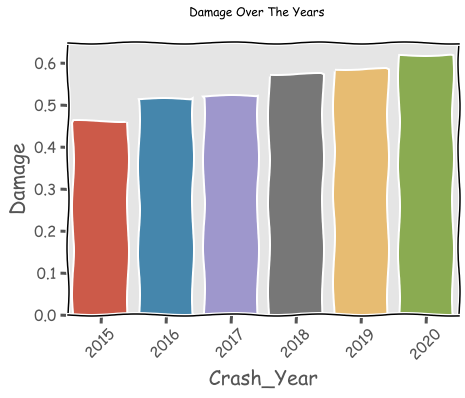

In [34]:
fig,ax = plt.subplots(figsize=(7, 5))
ax = sns.barplot(x='crash_year', y='damage', data=df,ci=None)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
fig.suptitle('Damage Over The Years', fontsize=12 )
ax.set_xlabel('Crash_Year',fontsize=20)
ax.set_ylabel('Damage',fontsize=20)
ax.tick_params(axis='x', labelsize=15) 
ax.tick_params(axis='y', labelsize=15)
plt.show();

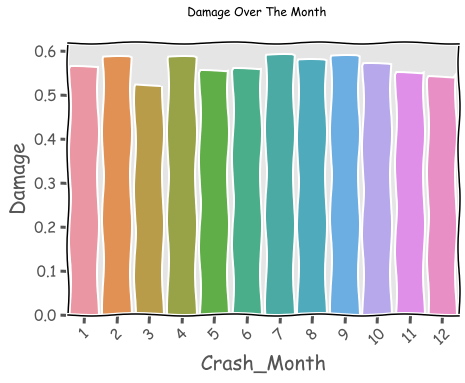

In [35]:
fig,ax = plt.subplots(figsize=(7, 5))
ax = sns.barplot(x='crash_month', y='damage', data=df,ci=None)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
fig.suptitle('Damage Over The Month', fontsize=12 )
ax.set_xlabel('Crash_Month',fontsize=20)
ax.set_ylabel('Damage',fontsize=20)
ax.tick_params(axis='x', labelsize=15) 
ax.tick_params(axis='y', labelsize=15)
plt.show();

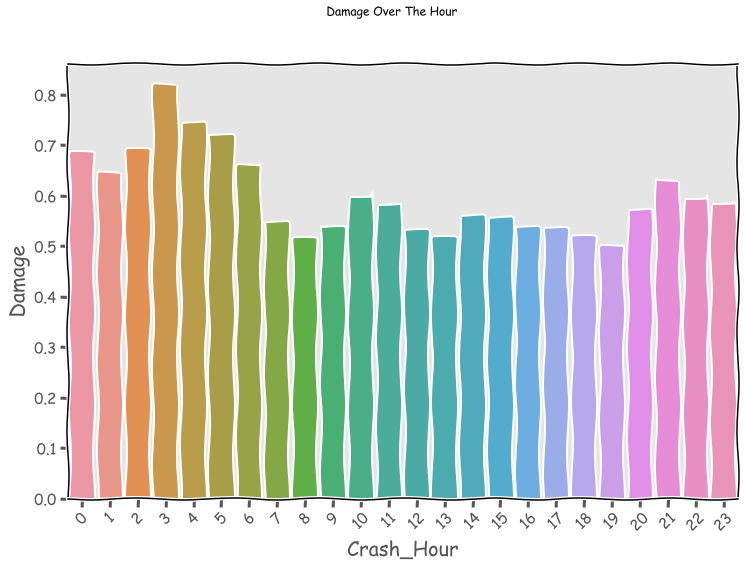

In [36]:
fig,ax = plt.subplots(figsize=(12, 8))
ax = sns.barplot(x='crash_hour', y='damage', data=df,ci=None)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
fig.suptitle('Damage Over The Hour', fontsize=12 )
ax.set_xlabel('Crash_Hour',fontsize=20)
ax.set_ylabel('Damage',fontsize=20)
ax.tick_params(axis='x', labelsize=15) 
ax.tick_params(axis='y', labelsize=15)
plt.show();

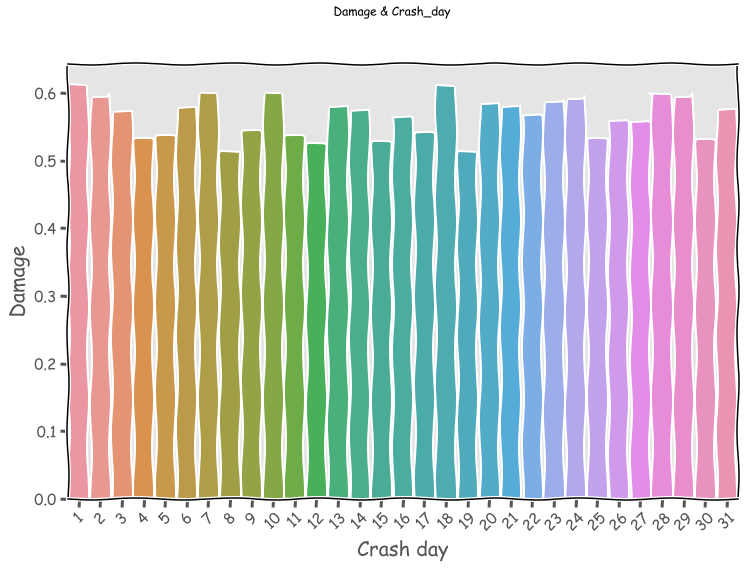

In [37]:
fig,ax = plt.subplots(figsize=(12, 8))
ax = sns.barplot(x='crash_day', y='damage', data=df,ci=None)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
fig.suptitle('Damage & Crash_day', fontsize=12 )
ax.set_xlabel('Crash day',fontsize=20)
ax.set_ylabel('Damage',fontsize=20)
ax.tick_params(axis='x', labelsize=15) 
ax.tick_params(axis='y', labelsize=15)
plt.show();

##### Analyzing column with Police_notification

In [38]:
df['date_police_notified']= pd.to_datetime(df['date_police_notified'])  

In [39]:
df['year_notified'] = df['date_police_notified'].dt.year
df['month_notified'] = df['date_police_notified'].dt.month
df['day_notified'] = df['date_police_notified'].dt.day
df['hour_notified'] = df['date_police_notified'].dt.hour

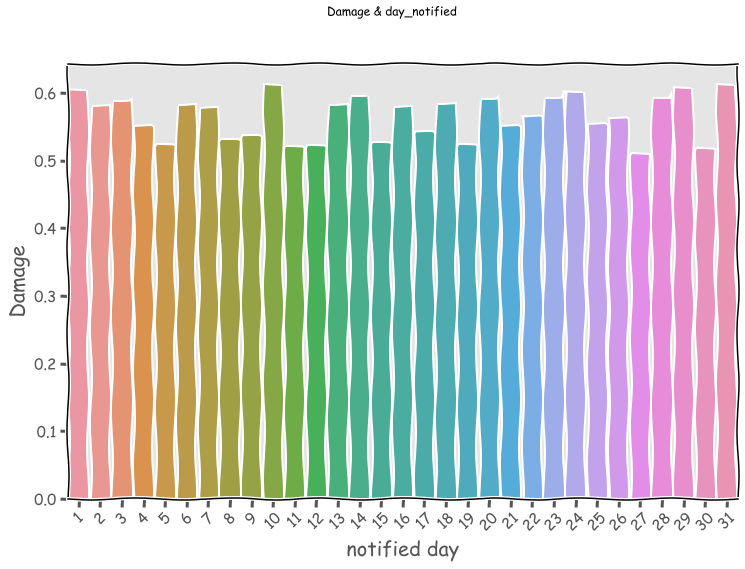

In [40]:
fig,ax = plt.subplots(figsize=(12, 8))
ax = sns.barplot(x='day_notified', y='damage', data=df,ci=None)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
fig.suptitle('Damage & day_notified', fontsize=12 )
ax.set_xlabel('notified day',fontsize=20)
ax.set_ylabel('Damage',fontsize=20)
ax.tick_params(axis='x', labelsize=15) 
ax.tick_params(axis='y', labelsize=15)
plt.show();

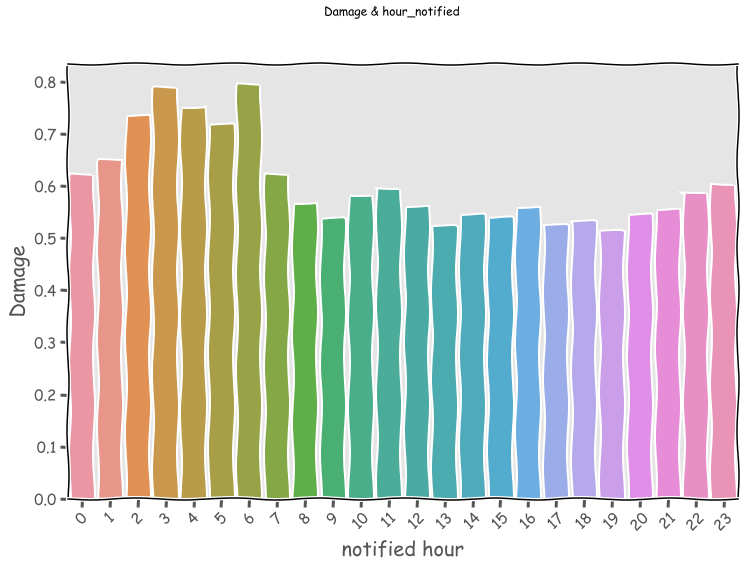

In [41]:
fig,ax = plt.subplots(figsize=(12, 8))
ax = sns.barplot(x='hour_notified', y='damage', data=df,ci=None)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
fig.suptitle('Damage & hour_notified', fontsize=12 )
ax.set_xlabel('notified hour',fontsize=20)
ax.set_ylabel('Damage',fontsize=20)
ax.tick_params(axis='x', labelsize=15) 
ax.tick_params(axis='y', labelsize=15)
plt.show();

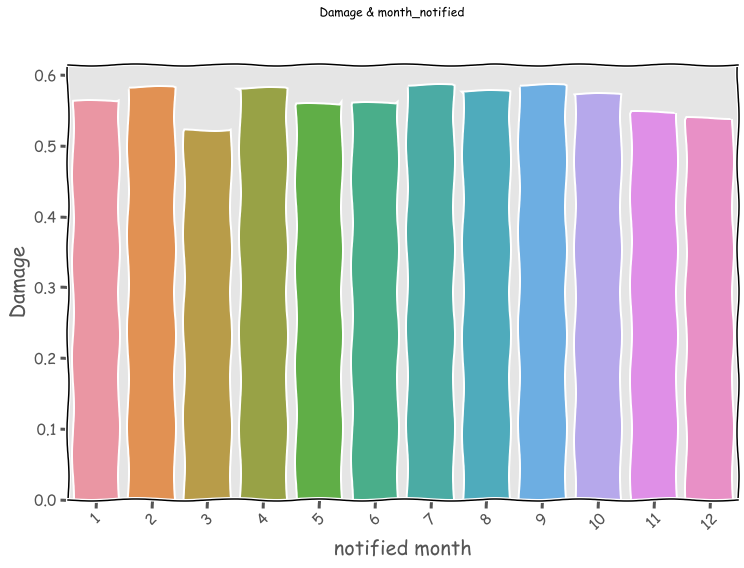

In [42]:
fig,ax = plt.subplots(figsize=(12, 8))
ax = sns.barplot(x='month_notified', y='damage', data=df,ci=None)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
fig.suptitle('Damage & month_notified', fontsize=12 )
ax.set_xlabel('notified month',fontsize=20)
ax.set_ylabel('Damage',fontsize=20)
ax.tick_params(axis='x', labelsize=15) 
ax.tick_params(axis='y', labelsize=15)
plt.show();

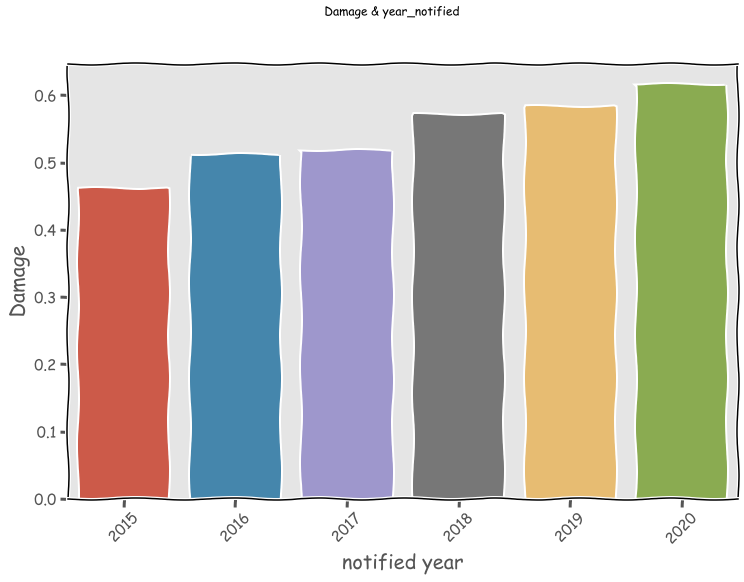

In [43]:
fig,ax = plt.subplots(figsize=(12, 8))
ax = sns.barplot(x='year_notified', y='damage', data=df,ci=None)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
fig.suptitle('Damage & year_notified', fontsize=12 )
ax.set_xlabel('notified year',fontsize=20)
ax.set_ylabel('Damage',fontsize=20)
ax.tick_params(axis='x', labelsize=15) 
ax.tick_params(axis='y', labelsize=15)
plt.show();

#### Analyzing column traffic_control_device

In [46]:
df['traffic_control_device'].value_counts()  

NO CONTROLS                 5519
TRAFFIC SIGNAL              2640
STOP SIGN/FLASHER            963
UNKNOWN                      357
OTHER                         58
LANE USE MARKING              24
YIELD                         16
OTHER REG. SIGN               10
POLICE/FLAGMAN                 8
OTHER WARNING SIGN             6
RAILROAD CROSSING GATE         6
FLASHING CONTROL SIGNAL        4
SCHOOL ZONE                    3
PEDESTRIAN CROSSING SIGN       3
OTHER RAILROAD CROSSING        3
DELINEATORS                    2
Name: traffic_control_device, dtype: int64

In [47]:
df.traffic_control_device[df.traffic_control_device == 'NO CONTROLS'] = 1
df.traffic_control_device[df.traffic_control_device == 'TRAFFIC SIGNAL'] = 2
df.traffic_control_device[df.traffic_control_device == 'STOP SIGN/FLASHER'] = 3
df.traffic_control_device[df.traffic_control_device == 'UNKNOWN'] = 4
df.traffic_control_device[df.traffic_control_device == 'OTHER'] = 5
df.traffic_control_device[df.traffic_control_device == 'LANE USE MARKING'] = 6
df.traffic_control_device[df.traffic_control_device == 'YIELD'] = 7
df.traffic_control_device[df.traffic_control_device == 'OTHER REG. SIGN'] = 8
df.traffic_control_device[df.traffic_control_device == 'POLICE/FLAGMAN'] = 9
df.traffic_control_device[df.traffic_control_device == 'OTHER WARNING SIGN'] = 10
df.traffic_control_device[df.traffic_control_device == 'RAILROAD CROSSING GATE'] = 11
df.traffic_control_device[df.traffic_control_device == 'FLASHING CONTROL SIGNAL'] = 12
df.traffic_control_device[df.traffic_control_device == 'PEDESTRIAN CROSSING SIGN'] = 13
df.traffic_control_device[df.traffic_control_device == 'OTHER RAILROAD CROSSING'] = 14
df.traffic_control_device[df.traffic_control_device == 'SCHOOL ZONE'] = 15
df.traffic_control_device[df.traffic_control_device == 'DELINEATORS'] = 16
df['traffic_control_device'].value_counts() 

1     5519
2     2640
3      963
4      357
5       58
6       24
7       16
8       10
9        8
11       6
10       6
12       4
15       3
14       3
13       3
16       2
Name: traffic_control_device, dtype: int64

##### Numerical Value : df.traffic_control_device
* NO CONTROLS = 1
* TRAFFIC SIGNAL = 2
* STOP SIGN/FLASHER = 3
* UNKNOWN = 4
* OTHER = 5
* LANE USE MARKING = 6
* YIELD = 7
* OTHER REG. SIGN = 8
* POLICE/FLAGMAN = 9
* OTHER WARNING SIGN = 10
* RAILROAD CROSSING GATE = 11
* FLASHING CONTROL SIGNAL = 12
* PEDESTRIAN CROSSING SIGN = 13
* OTHER RAILROAD CROSSING = 14
* SCHOOL ZONE = 15
* DELINEATORS = 16

Text(0.5, 8.95999999999998, 'traffic_control_device')

<Figure size 1440x2160 with 0 Axes>

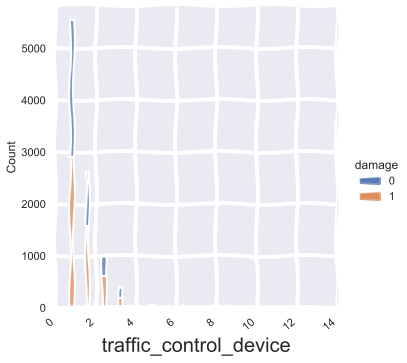

In [52]:
plt.figure(figsize=(20,30))
ax = sns.displot(df, x="traffic_control_device", hue = 'damage', multiple = 'stack')
ax.set_xticklabels(rotation=40, ha="right")
plt.xlabel('traffic_control_device', size = 20)

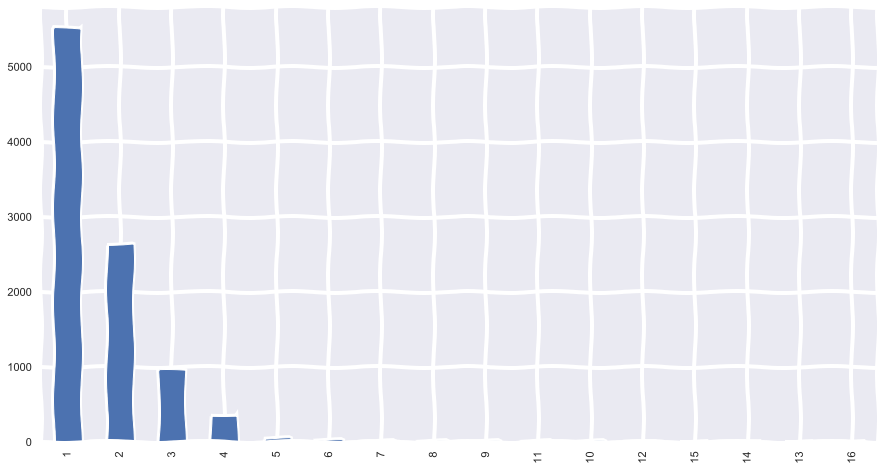

In [53]:
df['traffic_control_device'].value_counts().plot.bar() 

#### Analyzing column device_condition

In [56]:
df['device_condition'].value_counts()  

NO CONTROLS                 5568
FUNCTIONING PROPERLY        3305
UNKNOWN                      568
OTHER                         84
FUNCTIONING IMPROPERLY        63
NOT FUNCTIONING               32
WORN REFLECTIVE MATERIAL       2
Name: device_condition, dtype: int64

In [57]:
df.device_condition[df.device_condition == 'NO CONTROLS'] = 1
df.device_condition[df.device_condition == 'FUNCTIONING PROPERLY'] = 2
df.device_condition[df.device_condition == 'UNKNOWN'] = 3
df.device_condition[df.device_condition == 'OTHER'] = 4
df.device_condition[df.device_condition == 'FUNCTIONING IMPROPERLY'] = 5
df.device_condition[df.device_condition == 'NOT FUNCTIONING'] = 6
df.device_condition[df.device_condition == 'WORN REFLECTIVE MATERIAL'] = 7
df['device_condition'].value_counts() 

1    5568
2    3305
3     568
4      84
5      63
6      32
7       2
Name: device_condition, dtype: int64

##### Numerical Value : df.device_condition
* NO NO CONTROLS        = 1
* FUNCTIONING PROPERLY  = 2
* UNKNOWN               = 3     
* OTHER                  = 4       
* FUNCTIONING IMPROPERLY  = 5      
* NOT FUNCTIONING          = 6     
* WORN REFLECTIVE MATERIAL = 7

#### Analyzing column weather_condition

In [58]:
df['weather_condition'].value_counts() 

CLEAR                       7719
RAIN                         844
UNKNOWN                      422
SNOW                         317
CLOUDY/OVERCAST              267
OTHER                         24
FOG/SMOKE/HAZE                15
SLEET/HAIL                     8
FREEZING RAIN/DRIZZLE          3
SEVERE CROSS WIND GATE         2
BLOWING SAND, SOIL, DIRT       1
Name: weather_condition, dtype: int64

In [59]:
df.weather_condition[df.weather_condition == 'CLEAR'] = 1
df.weather_condition[df.weather_condition == 'RAIN'] = 2
df.weather_condition[df.weather_condition == 'UNKNOWN'] = 3
df.weather_condition[df.weather_condition == 'SNOW'] = 4
df.weather_condition[df.weather_condition == 'CLOUDY/OVERCAST'] = 5
df.weather_condition[df.weather_condition == 'OTHER'] = 6
df.weather_condition[df.weather_condition == 'FOG/SMOKE/HAZE'] = 7
df.weather_condition[df.weather_condition == 'SLEET/HAIL'] = 8
df.weather_condition[df.weather_condition == 'FREEZING RAIN/DRIZZLE'] = 9
df.weather_condition[df.weather_condition == 'SEVERE CROSS WIND GATE'] = 10
df.weather_condition[df.weather_condition == 'BLOWING SAND, SOIL, DIRT'] = 11
df['weather_condition'].value_counts() 

1     7719
2      844
3      422
4      317
5      267
6       24
7       15
8        8
9        3
10       2
11       1
Name: weather_condition, dtype: int64

##### Numerical Value : df.weather_condition
* CLEAR            =           1
* RAIN              =           2
* UNKNOWN            =          3
* SNOW                =         4
* CLOUDY/OVERCAST      =        5
* OTHER                =         6
* FOG/SMOKE/HAZE       =         7
* SLEET/HAIL            =         8
* FREEZING RAIN/DRIZZLE  =        9
* SEVERE CROSS WIND GATE  =       10
* BLOWING SAND, SOIL, DIRT =      11

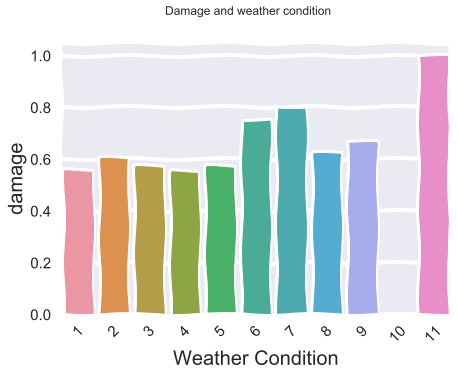

In [60]:
fig,ax = plt.subplots(figsize=(7, 5))
ax = sns.barplot(x='weather_condition', y='damage', data=df,ci=None)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
fig.suptitle('Damage and weather condition ', fontsize=12 )
ax.set_xlabel('Weather Condition',fontsize=20)
ax.set_ylabel('damage',fontsize=20)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
plt.show();

#### Analyzing column lighting_condition

In [61]:
df['lighting_condition'].value_counts() 

DAYLIGHT                  6373
DARKNESS, LIGHTED ROAD    1952
DARKNESS                   492
UNKNOWN                    351
DUSK                       294
DAWN                       160
Name: lighting_condition, dtype: int64

In [62]:
df.lighting_condition[df.lighting_condition == 'DAYLIGHT'] = 1
df.lighting_condition[df.lighting_condition == 'DARKNESS, LIGHTED ROAD'] = 2
df.lighting_condition[df.lighting_condition == 'DARKNESS'] = 3
df.lighting_condition[df.lighting_condition == 'UNKNOWN'] = 4
df.lighting_condition[df.lighting_condition == 'DUSK'] = 5
df.lighting_condition[df.lighting_condition == 'DAWN'] = 6
df['lighting_condition'].value_counts() 

1    6373
2    1952
3     492
4     351
5     294
6     160
Name: lighting_condition, dtype: int64

##### Numerical Value : df.lighting_condition
* DAYLIGHT             =     1
* DARKNESS, LIGHTED ROAD =    2
* DARKNESS                =   3
* UNKNOWN                  =  4
* DUSK                      = 5
* DAWN                      = 6

#### Analyzing column first_crash_type

In [64]:
df['first_crash_type'].value_counts() 

REAR END                        2322
PARKED MOTOR VEHICLE            2211
SIDESWIPE SAME DIRECTION        1490
TURNING                         1336
ANGLE                           1075
FIXED OBJECT                     424
PEDESTRIAN                       214
SIDESWIPE OPPOSITE DIRECTION     139
PEDALCYCLIST                     128
OTHER OBJECT                      83
HEAD ON                           83
REAR TO FRONT                     53
REAR TO SIDE                      22
OTHER NONCOLLISION                21
REAR TO REAR                      14
OVERTURNED                         6
ANIMAL                             1
Name: first_crash_type, dtype: int64

In [65]:
df.first_crash_type[df.first_crash_type == 'REAR END'] = 1
df.first_crash_type[df.first_crash_type == 'PARKED MOTOR VEHICLE'] = 2
df.first_crash_type[df.first_crash_type == 'SIDESWIPE SAME DIRECTION'] = 3
df.first_crash_type[df.first_crash_type == 'TURNING'] = 4
df.first_crash_type[df.first_crash_type == 'ANGLE'] = 5
df.first_crash_type[df.first_crash_type == 'FIXED OBJECT'] = 6
df.first_crash_type[df.first_crash_type == 'PEDESTRIAN'] = 7
df.first_crash_type[df.first_crash_type == 'SIDESWIPE OPPOSITE DIRECTION'] = 8
df.first_crash_type[df.first_crash_type == 'PEDALCYCLIST'] = 9
df.first_crash_type[df.first_crash_type == 'HEAD ON'] = 10
df.first_crash_type[df.first_crash_type == 'OTHER OBJECT'] = 11
df.first_crash_type[df.first_crash_type == 'REAR TO FRONT'] = 12
df.first_crash_type[df.first_crash_type == 'REAR TO SIDE'] = 13
df.first_crash_type[df.first_crash_type == 'OTHER NONCOLLISION'] = 14
df.first_crash_type[df.first_crash_type == 'REAR TO REAR'] = 15
df.first_crash_type[df.first_crash_type == 'OVERTURNED'] = 16
df.first_crash_type[df.first_crash_type == 'ANIMAL'] = 17
df['first_crash_type'].value_counts()

1     2322
2     2211
3     1490
4     1336
5     1075
6      424
7      214
8      139
9      128
10      83
11      83
12      53
13      22
14      21
15      14
16       6
17       1
Name: first_crash_type, dtype: int64

##### Numerical Value : df.first_crash_type
* REAR END                 =       1
* PARKED MOTOR VEHICLE        =    2
* SIDESWIPE SAME DIRECTION     =   3
* TURNING                      =   4
* ANGLE                         =  5
* FIXED OBJECT                   =  6
* PEDESTRIAN                      = 7
* SIDESWIPE OPPOSITE DIRECTION     = 8
* PEDALCYCLIST                   =  9
* OTHER OBJECT                   =   10
* HEAD ON                        =   11
* REAR TO FRONT                  =   12
* REAR TO SIDE                   =   13
* OTHER NONCOLLISION             =   14
* REAR TO REAR                   =   15
* OVERTURNED                     =    16
* ANIMAL                         =    17

#### Analyzing column first_crash_type

In [64]:
df['first_crash_type'].value_counts() 

REAR END                        2322
PARKED MOTOR VEHICLE            2211
SIDESWIPE SAME DIRECTION        1490
TURNING                         1336
ANGLE                           1075
FIXED OBJECT                     424
PEDESTRIAN                       214
SIDESWIPE OPPOSITE DIRECTION     139
PEDALCYCLIST                     128
OTHER OBJECT                      83
HEAD ON                           83
REAR TO FRONT                     53
REAR TO SIDE                      22
OTHER NONCOLLISION                21
REAR TO REAR                      14
OVERTURNED                         6
ANIMAL                             1
Name: first_crash_type, dtype: int64

In [65]:
df.first_crash_type[df.first_crash_type == 'REAR END'] = 1
df.first_crash_type[df.first_crash_type == 'PARKED MOTOR VEHICLE'] = 2
df.first_crash_type[df.first_crash_type == 'SIDESWIPE SAME DIRECTION'] = 3
df.first_crash_type[df.first_crash_type == 'TURNING'] = 4
df.first_crash_type[df.first_crash_type == 'ANGLE'] = 5
df.first_crash_type[df.first_crash_type == 'FIXED OBJECT'] = 6
df.first_crash_type[df.first_crash_type == 'PEDESTRIAN'] = 7
df.first_crash_type[df.first_crash_type == 'SIDESWIPE OPPOSITE DIRECTION'] = 8
df.first_crash_type[df.first_crash_type == 'PEDALCYCLIST'] = 9
df.first_crash_type[df.first_crash_type == 'HEAD ON'] = 10
df.first_crash_type[df.first_crash_type == 'OTHER OBJECT'] = 11
df.first_crash_type[df.first_crash_type == 'REAR TO FRONT'] = 12
df.first_crash_type[df.first_crash_type == 'REAR TO SIDE'] = 13
df.first_crash_type[df.first_crash_type == 'OTHER NONCOLLISION'] = 14
df.first_crash_type[df.first_crash_type == 'REAR TO REAR'] = 15
df.first_crash_type[df.first_crash_type == 'OVERTURNED'] = 16
df.first_crash_type[df.first_crash_type == 'ANIMAL'] = 17
df['first_crash_type'].value_counts()

1     2322
2     2211
3     1490
4     1336
5     1075
6      424
7      214
8      139
9      128
10      83
11      83
12      53
13      22
14      21
15      14
16       6
17       1
Name: first_crash_type, dtype: int64

##### Numerical Value : df.first_crash_type
* REAR END                 =       1
* PARKED MOTOR VEHICLE        =    2
* SIDESWIPE SAME DIRECTION     =   3
* TURNING                      =   4
* ANGLE                         =  5
* FIXED OBJECT                   =  6
* PEDESTRIAN                      = 7
* SIDESWIPE OPPOSITE DIRECTION     = 8
* PEDALCYCLIST                   =  9
* OTHER OBJECT                   =   10
* HEAD ON                        =   11
* REAR TO FRONT                  =   12
* REAR TO SIDE                   =   13
* OTHER NONCOLLISION             =   14
* REAR TO REAR                   =   15
* OVERTURNED                     =    16
* ANIMAL                         =    17

#### Analyzing column trafficway_type

In [66]:
df['trafficway_type'].value_counts()

NOT DIVIDED                        4352
DIVIDED - W/MEDIAN (NOT RAISED)    1729
ONE-WAY                            1283
PARKING LOT                         659
DIVIDED - W/MEDIAN BARRIER          552
OTHER                               316
FOUR WAY                            255
ALLEY                               146
UNKNOWN                             115
CENTER TURN LANE                     81
T-INTERSECTION                       46
DRIVEWAY                             34
RAMP                                 20
UNKNOWN INTERSECTION TYPE            12
FIVE POINT, OR MORE                  11
Y-INTERSECTION                        6
TRAFFIC ROUTE                         3
L-INTERSECTION                        1
ROUNDABOUT                            1
Name: trafficway_type, dtype: int64

In [67]:
df.trafficway_type[df.trafficway_type == 'NOT DIVIDED'] = 1
df.trafficway_type[df.trafficway_type == 'DIVIDED - W/MEDIAN (NOT RAISED)'] = 2
df.trafficway_type[df.trafficway_type == 'ONE-WAY'] = 3
df.trafficway_type[df.trafficway_type == 'PARKING LOT'] = 4
df.trafficway_type[df.trafficway_type == 'DIVIDED - W/MEDIAN BARRIER'] = 5
df.trafficway_type[df.trafficway_type == 'OTHER'] = 6
df.trafficway_type[df.trafficway_type == 'FOUR WAY'] = 7
df.trafficway_type[df.trafficway_type == 'ALLEY'] = 8
df.trafficway_type[df.trafficway_type == 'UNKNOWN'] = 9
df.trafficway_type[df.trafficway_type == 'CENTER TURN LANE'] = 10
df.trafficway_type[df.trafficway_type == 'T-INTERSECTION'] = 11
df.trafficway_type[df.trafficway_type == 'DRIVEWAY'] = 12
df.trafficway_type[df.trafficway_type == 'RAMP'] = 13
df.trafficway_type[df.trafficway_type == 'UNKNOWN INTERSECTION TYPE'] = 14
df.trafficway_type[df.trafficway_type == 'FIVE POINT, OR MORE'] = 15
df.trafficway_type[df.trafficway_type == 'Y-INTERSECTION'] = 16
df.trafficway_type[df.trafficway_type == 'TRAFFIC ROUTE'] = 17
df.trafficway_type[df.trafficway_type == 'ROUNDABOUT'] = 18
df.trafficway_type[df.trafficway_type == 'L-INTERSECTION'] = 19
df['trafficway_type'].value_counts()

1     4352
2     1729
3     1283
4      659
5      552
6      316
7      255
8      146
9      115
10      81
11      46
12      34
13      20
14      12
15      11
16       6
17       3
18       1
19       1
Name: trafficway_type, dtype: int64

##### Numerical Value : df.trafficway_type
* NOT DIVIDED                    =    1
* DIVIDED - W/MEDIAN (NOT RAISED)=    2
* ONE-WAY                        =    3
* PARKING LOT                    =     4
* DIVIDED - W/MEDIAN BARRIER     =     5
* OTHER                          =     6
* FOUR WAY                       =     7
* ALLEY                          =     8
* UNKNOWN                        =     9
* CENTER TURN LANE               =      10
* T-INTERSECTION                 =      11
* DRIVEWAY                       =      12
* RAMP                           =      13
* UNKNOWN INTERSECTION TYPE      =      14
* FIVE POINT, OR MORE            =      15
* Y-INTERSECTION                 =       16
* TRAFFIC ROUTE                  =       17
* L-INTERSECTION                 =       18
* ROUNDABOUT                     =       19

In [69]:
df.head(2) 

,id,crash_record_id,rd_no,crash_date,posted_speed_limit,traffic_control_device,device_condition,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,report_type,crash_type,damage,date_police_notified,prim_contributory_cause,sec_contributory_cause,street_no,street_direction,street_name,beat_of_occurrence,num_units,most_severe_injury,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,injuries_unknown,crash_hour,crash_day_of_week,crash_month,latitude,longitude,location,rd_number,rd_Letter,location_number,location_letter,crash_year,crash_day,year_notified,month_notified,day_notified,hour_notified
0,280396,a48eb663494810bd8058ee5acbf04ec98b8254ee6d3cc7...,JC525633,2019-11-26 17:45:00,30,3,2,2,3,9,3,STRAIGHT AND LEVEL,WET,UNKNOWN,0,1,0,2019-11-26 18:17:00,IMPROPER OVERTAKING/PASSING,IMPROPER OVERTAKING/PASSING,799,W,MELROSE ST,1925.0,3,"REPORTED, NOT EVIDENT",1.0,0.0,0.0,0.0,1.0,2.0,0.0,17,3,11,41.940958,-87.649185,POINT (-87.649185137051 41.940957825729),525633,JC,(-87.649185137051 41.940957825729),POINT,2019,26,2019,11,26,18
1,406594,e7f110ed1bf2d7ad3a5938d6c4749221e141ee0825fc81...,JB493847,2018-10-28 16:40:00,30,1,1,2,1,11,5,STRAIGHT AND LEVEL,WET,NO DEFECTS,1,1,1,2018-10-28 16:50:00,EQUIPMENT - VEHICLE CONDITION,WEATHER,4420,W,CERMAK RD,1012.0,1,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,0.0,16,1,10,41.851498,-87.735394,POINT (-87.735393838111 41.851498141703),493847,JB,(-87.735393838111 41.851498141703),POINT,2018,28,2018,10,28,16
